# Task 6.1 - Sourcing Open Data

Contents:

Import Libraries.

Loading and understanding data.

Checking for Missing and duplicate values.

Checking for Mixed type columns.

Data Exploration.

Data Export.

In [3]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_bank = pd.read_csv(r"C:\Users\Home\Desktop\Career Foundry- Data Analyst.2\Task Submissions\Task excercise 6-Final\Task 1\bank\Bank Customer Churn Prediction.csv")

In [11]:
df_bank.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df_bank.describe

<bound method NDFrame.describe of       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  es

In [50]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [15]:
df_bank.shape

(10000, 12)

# Checking Missing Values 

In [16]:
df_bank.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

There is no missing values in any columns

In [18]:
df_bank.duplicated().sum()

0

There is no duplicates

# Checking for mixed typr columns.

In [19]:
# Check each column for mixed types
mixed_type_columns = []
for col in df_bank.columns:
    unique_types = df_bank[col].apply(type).unique()
    if len(unique_types) > 1:
        mixed_type_columns.append(col)

# Print mixed type columns
print("Columns with mixed types:", mixed_type_columns)


Columns with mixed types: []


In [21]:
mixed_type_columns = []
for col in df_bank.columns:
    try:
        df_bank[col].astype(str)
    except ValueError:
        mixed_type_columns.append(col)

# Print mixed type columns
print("Columns with mixed types:", mixed_type_columns)


Columns with mixed types: []


# Data Exploration

In [22]:
#Count of customers per country
customer_counts = df_bank['country'].value_counts()


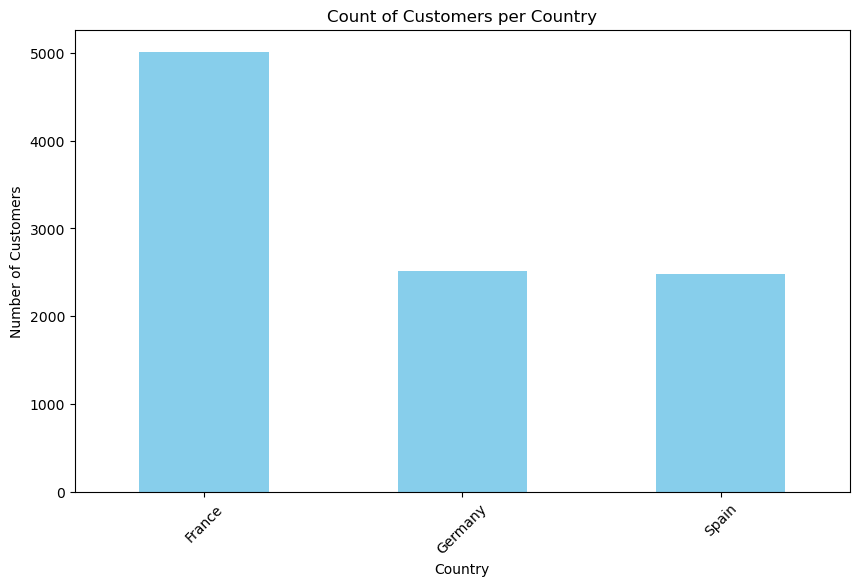

In [23]:
plt.figure(figsize=(10, 6))
customer_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Customers per Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

Majorirty of customers are based in France 

C:\Users\Home\AppData\Local\Temp\ipykernel_8540\246477024.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='age', hue='gender', data=df_bank, ci=None, palette='pastel')


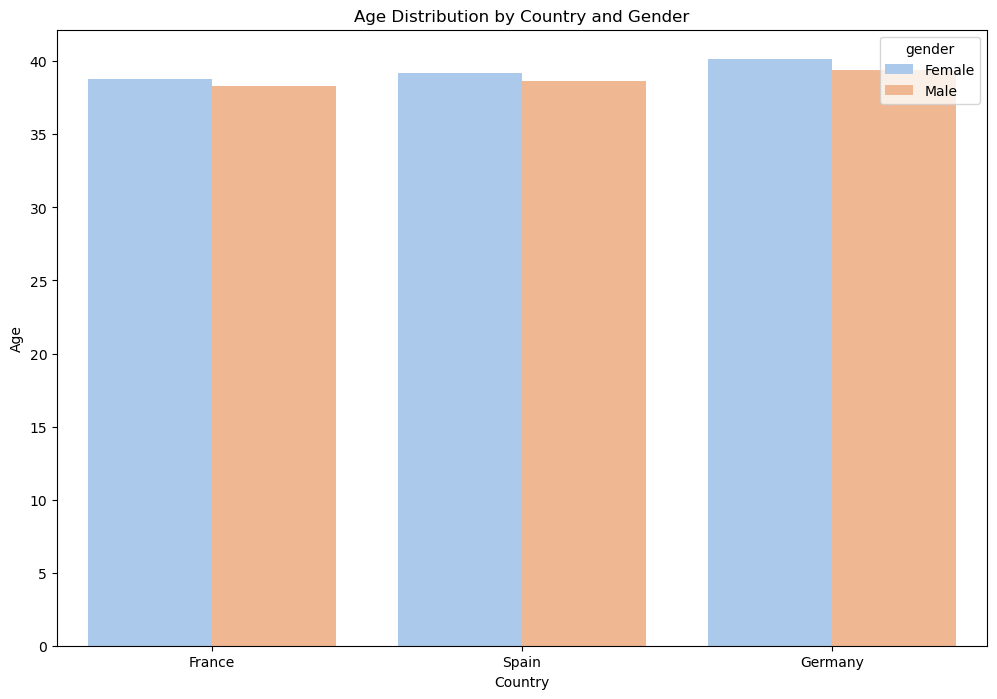

In [25]:
#Age distribution by country and gender
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='age', hue='gender', data=df_bank, ci=None, palette='pastel')
plt.title('Age Distribution by Country and Gender')
plt.xlabel('Country')
plt.ylabel('Age')
plt.show()

In [27]:
# Create the scatter plot for the relationship between credit score and country
avg_credit_score_by_country = df_bank.groupby('country')['credit_score'].mean().reset_index()

C:\Users\Home\AppData\Local\Temp\ipykernel_8540\423499481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='credit_score', data=df_bank, palette='pastel')


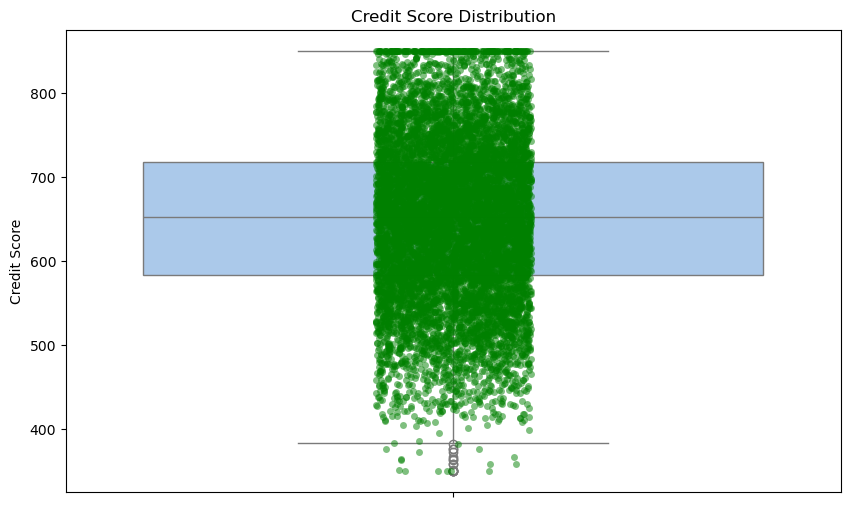

In [36]:
# Create the box plot for credit score
plt.figure(figsize=(10, 6))
sns.boxplot(y='credit_score', data=df_bank, palette='pastel')

# Overlay the strip plot for individual data points
sns.stripplot(y='credit_score', data=df_bank, color='green', alpha=0.5)

plt.title('Credit Score Distribution')
plt.ylabel('Credit Score')
plt.show()

In [31]:
# Calculate summary statistics for the 'credit_score' column
summary_stats = {
    'Mean': df_bank['credit_score'].mean(),
    'Median': df_bank['credit_score'].median(),
    'Mode': df_bank['credit_score'].mode()[0],  # mode() returns a Series, take the first mode
    'Min': df_bank['credit_score'].min(),
    'Max': df_bank['credit_score'].max()}

In [32]:
# Convert the dictionary to a DataFrame for easier plotting
summary_stats_df = pd.DataFrame(list(summary_stats.items()), columns=['Statistic', 'Value'])


C:\Users\Home\AppData\Local\Temp\ipykernel_8540\1155933831.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Statistic', y='Value', data=summary_stats_df, palette='pastel')


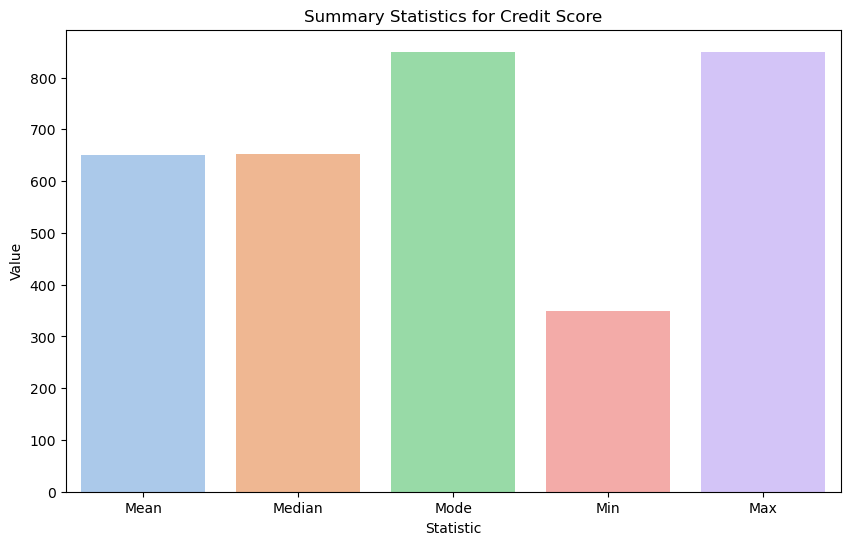

In [37]:
# Convert the dictionary to a DataFrame for easier plotting
summary_stats_df = pd.DataFrame(list(summary_stats.items()), columns=['Statistic', 'Value'])

# Create the bar chart for summary statistics
plt.figure(figsize=(10, 6))
sns.barplot(x='Statistic', y='Value', data=summary_stats_df, palette='pastel')
plt.title('Summary Statistics for Credit Score')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.show()

In [41]:
# Calculate churn rate by country
churn_rate_by_country = df_bank.groupby('country')['churn'].mean().reset_index()

C:\Users\Home\AppData\Local\Temp\ipykernel_8540\1236829795.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='churn', data=churn_rate_by_country, palette='viridis')


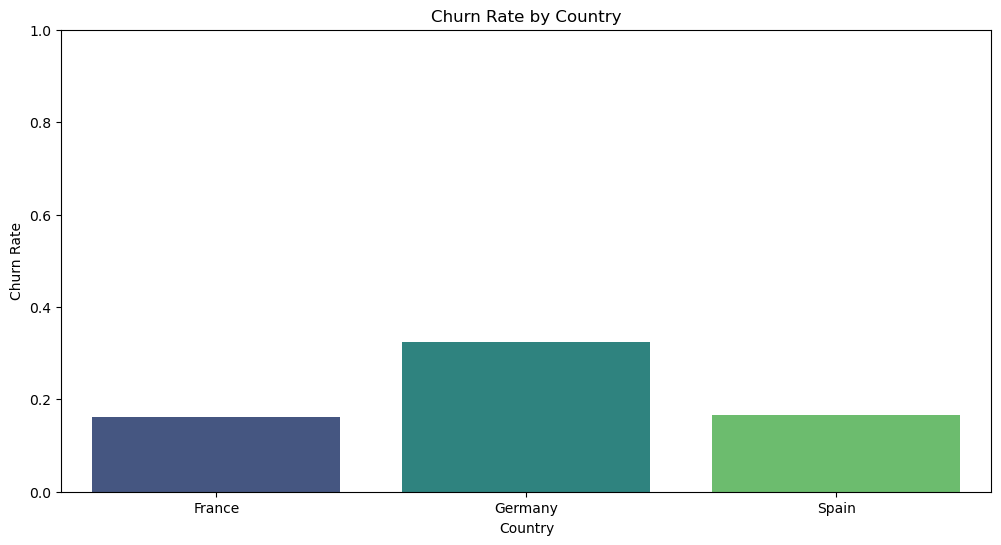

In [42]:
# Create the bar chart for churn rate by country
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='churn', data=churn_rate_by_country, palette='viridis')
plt.title('Churn Rate by Country')
plt.xlabel('Country')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)  # Churn rate is a proportion, so it should be between 0 and 1
plt.show()

C:\Users\Home\AppData\Local\Temp\ipykernel_8540\343786152.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='balance', data=df_bank, palette='viridis')


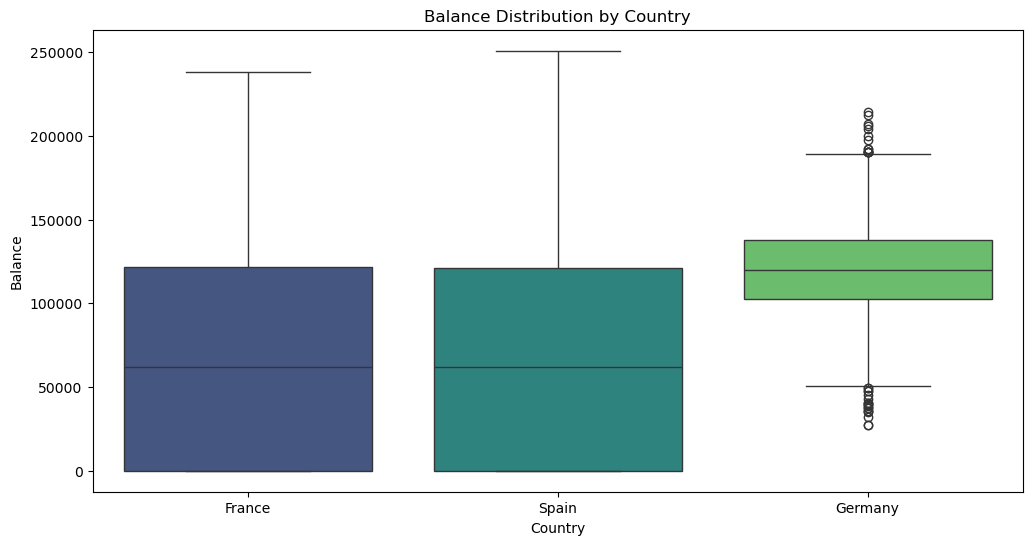

In [43]:
# Create the box plot for balance distribution by country
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='balance', data=df_bank, palette='viridis')
plt.title('Balance Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Balance')
plt.show()

In [44]:
# Calculate churn rate by credit card holding status
churn_rate_by_credit_card = df_bank.groupby('credit_card')['churn'].mean().reset_index()
churn_rate_by_credit_card['credit_card'] = churn_rate_by_credit_card['credit_card'].map({0: 'No', 1: 'Yes'})

C:\Users\Home\AppData\Local\Temp\ipykernel_8540\2045852033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='credit_card', y='churn', data=churn_rate_by_credit_card, palette='viridis')


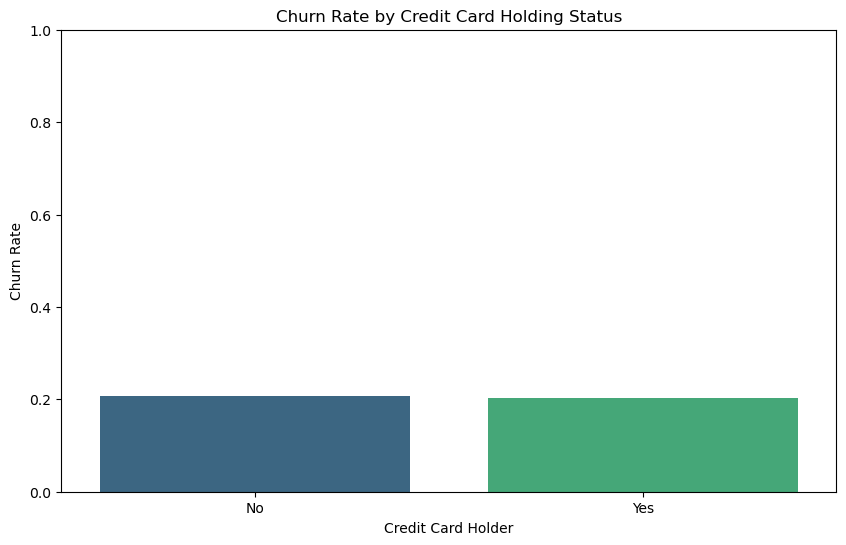

In [45]:
# Create the bar chart for churn rate by credit card holding status
plt.figure(figsize=(10, 6))
sns.barplot(x='credit_card', y='churn', data=churn_rate_by_credit_card, palette='viridis')
plt.title('Churn Rate by Credit Card Holding Status')
plt.xlabel('Credit Card Holder')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)  
plt.show()

In [47]:
# Count active vs inactive members
active_inactive_counts = df_bank['active_member'].value_counts()

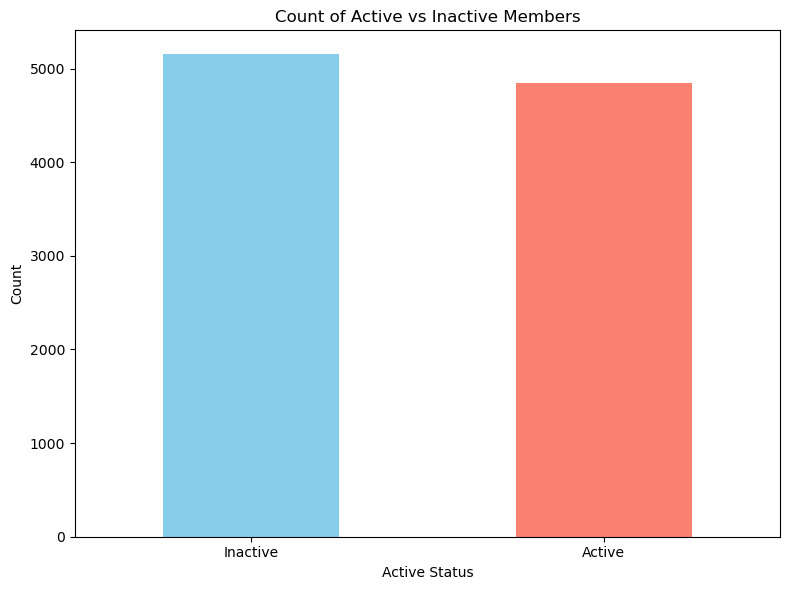

In [48]:
# Plotting
plt.figure(figsize=(8, 6))
active_inactive_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Active vs Inactive Members')
plt.xlabel('Active Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Inactive', 'Active'], rotation=0)
plt.tight_layout()
plt.show()

Inactive members are slightly more than active members

In [49]:
# Example: Checking frequency counts for the 'gender' column
gender_counts = df_bank['gender'].value_counts()

# Print the frequency counts
print("Frequency counts for 'gender' column:")
print(gender_counts)

Frequency counts for 'gender' column:
gender
Male      5457
Female    4543
Name: count, dtype: int64


In [51]:
df_bank.to_csv(r"C:\Users\Home\Desktop\Career Foundry- Data Analyst.2\Task Submissions\Task excercise 6-Final\Task 1\bank\Bank Customer Churn Prediction_updated.csv", index=False)
